In [20]:
from collections import Counter
import spacy
import textacy
from spacy import displacy
import pandas as pd
import numpy as np
from wordfreq import word_frequency
from wordfreq import zipf_frequency
import matplotlib.pyplot as plt
import random
import os
from scipy.stats import pearsonr
import sklearn
import json

nlp = spacy.load('en_core_web_sm')

In [21]:
cwd = os.getcwd()
train_data = open(f'{cwd}/data/preprocessed/train/sentences.txt', encoding='utf-8')
text = train_data.read()
train_data_doc = nlp(text)

<h1><b>PART A</b></h1>

<b>TASK 1</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [22]:
word_frequencies = Counter()
words_per_sentence = []

for sentence in train_data_doc.sents:
    words = []
    words_single_sentence = 0
    for token in sentence:
        # Let's filter out punctuation and new lines ("/n")
        if (not token.is_punct) and (not token.is_space):
            words.append(token.text)
            words_single_sentence += 1
    words_per_sentence.append(words_single_sentence)
    word_frequencies.update(words)

#print(word_frequencies)
num_tokens = len(train_data_doc)
num_words = sum(word_frequencies.values())
num_types = len(word_frequencies.keys())
avg_num_words_per_sentence = sum(words_per_sentence) / len(words_per_sentence)
avg_word_length = sum(len(word) for word in words) / len(words)

print('Number of Tokens: ' + str(num_tokens))
print('Number of Words: ' + str(num_words))
print('Number of Types: ' + str(num_types))

print('Average number of words per sentence: {number:.{digits}f}'.format(number = avg_num_words_per_sentence, digits = 2))
print('Average word length: {number:.{digits}f}'.format(number = avg_word_length, digits = 2))

Number of Tokens: 16130
Number of Words: 13242
Number of Types: 3721
Average number of words per sentence: 18.44
Average word length: 3.57


<b>TASK 2</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [23]:
pos_list = []

NN_Noun = []
NNP_Propn = []
IN_Adp = []
DT_Det = []
JJ_Adj = []
NNS_Noun = []
COMMA_Punct = []
PERIOD_Punct = []
SP_Space = []
VBN_Verb = []

for token in train_data_doc:
    #print(token.pos_, token.tag_)
    pos_list.append('{}, {}'.format(token.pos_, token.tag_))
    if ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NN'):
        NN_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PROPN, NNP'):
        NNP_Propn.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADP, IN'):
        IN_Adp.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'DET, DT'):
        DT_Det.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADJ, JJ'):
        JJ_Adj.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NNS'):
        NNS_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, ,'):
        COMMA_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, .'):
        PERIOD_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'SPACE, _SP'):
        SP_Space.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'VERB, VBN'):
        VBN_Verb.append(token.text)


# pos_frequencies = Counter(pos_list)
# print(pos_frequencies)
# print(round(pos_frequencies['NOUN, NN']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['PROPN, NNP']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['ADP, IN']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['DET, DT']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['ADJ, JJ']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['NOUN, NNS']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['PUNCT, ,']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['PUNCT, .']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['SPACE, _SP']/sum(pos_frequencies.values()), 2))
# print(round(pos_frequencies['VERB, VBN']/sum(pos_frequencies.values()), 2))


print(Counter(NN_Noun).most_common(3))
print(Counter(NNP_Propn).most_common(3))
print(Counter(IN_Adp).most_common(3))
print(Counter(DT_Det).most_common(3))
print(Counter(JJ_Adj).most_common(3))
print(Counter(NNS_Noun).most_common(3))
print(Counter(COMMA_Punct).most_common(3))
print(Counter(PERIOD_Punct).most_common(3))
print(Counter(SP_Space).most_common(3))
print(Counter(VBN_Verb).most_common(3))

#infrequent tokens
print(Counter(NN_Noun).most_common()[-1])
print(Counter(NNP_Propn).most_common()[-1])
print(Counter(IN_Adp).most_common()[-1])
print(Counter(DT_Det).most_common()[-1])
print(Counter(JJ_Adj).most_common()[-1])
print(Counter(NNS_Noun).most_common()[-1])
print(Counter(COMMA_Punct).most_common()[-1])
print(Counter(PERIOD_Punct).most_common()[-1])
print(Counter(SP_Space).most_common()[-1])
print(Counter(VBN_Verb).most_common()[-1])

[('\\', 52), ('year', 29), ('report', 23)]
[('\\', 211), ('US', 24), ('President', 19)]
[('of', 352), ('in', 281), ('to', 153)]
[('the', 723), ('a', 279), ('The', 124)]
[('other', 26), ('Russian', 20), ('presidential', 18)]
[('ants', 42), ('troops', 19), ('people', 15)]
[(',', 697), (';', 1), ('…', 1)]
[('.', 638), ('?', 16), ('!', 1)]
[('\n', 653)]
[('accused', 12), ('reported', 8), ('known', 8)]
('project', 1)
('Navy', 1)
('By', 1)
('Each', 1)
('Sebastian', 1)
('areas', 1)
('…', 1)
('!', 1)
('\n', 653)
('acquitted', 1)


<b>TASK 3</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [24]:
ngrams = list(textacy.extract.basics.ngrams(train_data_doc, 2, filter_stops=False, filter_punct=False))
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))


pos_list = [str(token.pos_) for token in train_data_doc] #nlp() needs string
pos_list_string = nlp(' '.join(pos_list)) #textacy.extract.basics.ngrams() needs nlp()-element
ngrams = list(textacy.extract.basics.ngrams(pos_list_string, 2))    #ATTENTION: textacy.extract.basics.ngrams() produces elements with type of "spacy.tokens.span.Span", not "str" -> Counter doesn't work for "spacy.tokens.span.Span"
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))

[('\\"', 240), ('of the', 82), (', and', 67)]
[('DET NOUN', 780), ('NOUN PUNCT', 769), ('NOUN ADP', 707)]


<b>TASK 4</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [25]:
for token_i in train_data_doc:
    forms = []
    counter = 0
    lemma = token_i.lemma_
    if str(token_i.lemma_) == 'be':
        continue
    for token_j in train_data_doc:
        if str(token_j.lemma_) == str(token_i.lemma_):
            token_j = str(token_j).lower()
            if (token_j not in forms) and (token_j != lemma):
                forms.append(token_j)
                counter += 1
    if counter > 2:
        break

print(lemma)
print(forms)
print(counter)

say
['said', 'saying', 'says']
3


<b>TASK 5</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [26]:
print(len(train_data_doc.ents))
print(len(Counter([ent.label_ for ent in train_data_doc.ents]).keys()))
print(Counter([ent.label_ for ent in train_data_doc.ents]).keys())
stop_counter = 0
for sentence in train_data_doc.sents:
   stop_counter += 1
   displacy.render(sentence, jupyter=True, style='ent')
   if stop_counter == 5: break

1627
17
dict_keys(['DATE', 'GPE', 'ORDINAL', 'CARDINAL', 'ORG', 'PERSON', 'LAW', 'QUANTITY', 'NORP', 'TIME', 'EVENT', 'LOC', 'PERCENT', 'MONEY', 'PRODUCT', 'FAC', 'WORK_OF_ART'])


/home/damion/anaconda3/envs/NLPT/lib/python3.8/site-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<h1><b>PART B</b></h1>

In [27]:
#wiki_news_train = open('C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/data/original/english/WikiNews_Train.tsv', encoding='utf-8')
wiki_news_train_df = pd.read_table(f'{cwd}/data/original/english/WikiNews_Train.tsv', header = None)
wiki_news_train_df.columns = ['ID', 'sentence', 'start_index', 'end_index', 'target_word', 'nat', 'non-nat', 'nat diff', 'non-nat diff', 'binary', 'prob']

<b>TASK 7</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [28]:
print(Counter(wiki_news_train_df['binary']))
print((wiki_news_train_df['prob'].min()))
print((wiki_news_train_df['prob']).max())
print((wiki_news_train_df['prob']).median())
print((wiki_news_train_df['prob']).mean())
print((wiki_news_train_df['prob']).std())

counter = 0
max_num_of_tokens = 0
for instance in wiki_news_train_df['target_word']:
    instance = nlp(instance)
    tokens_per_instance = [token.text for token in instance]
    if len(tokens_per_instance) > 1:
        counter += 1
    if len(tokens_per_instance) > max_num_of_tokens:
        max_num_of_tokens = len(tokens_per_instance)

print(counter)
print(max_num_of_tokens)

Counter({0: 4530, 1: 3216})
0.0
1.0
0.0
0.08394655305964374
0.16967909326094677
1086
10


<b>TASK 8</b><font color='red'> (must be included in file TODO_analyses.py)</font>

In [29]:
length_tokens = []
frequency = []
prob = []
pos = []


#filter only instances with one token and which are labeled as complex from at least one annotator
for index, row in wiki_news_train_df.iterrows():
    instance = nlp(row['target_word'])
    tokens_per_instance = [token for token in instance]
    if (len(tokens_per_instance) == 1) and (row['binary'] == 1):
        length_tokens.append(len(tokens_per_instance[0].text))   
        frequency.append(zipf_frequency(tokens_per_instance[0].text, 'en'))
        prob.append(row['prob'])
        pos.append(tokens_per_instance[0].pos_)


In [30]:
# print("Pearson correlation length and complexity: {}".format(np.corrcoef(length_tokens, prob)))
# print("Pearson correlation frequency and complexity: {}".format(np.corrcoef(frequency, prob)))

print("Pearson correlation length and complexity: {}".format(pearsonr(length_tokens, prob)))
print("Pearson correlation frequency and complexity: {}".format(pearsonr(frequency, prob)))

Pearson correlation length and complexity: (0.3020751387042099, 4.103410007102572e-52)
Pearson correlation frequency and complexity: (-0.26876915450151273, 3.2226022021238034e-41)


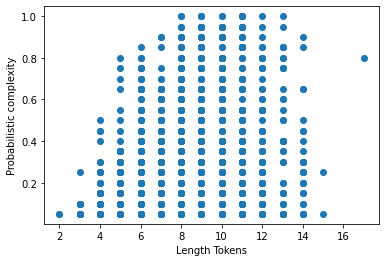

In [31]:
plt.scatter(length_tokens, prob)
plt.xlabel("Length Tokens")
plt.ylabel("Probabilistic complexity")
plt.show()

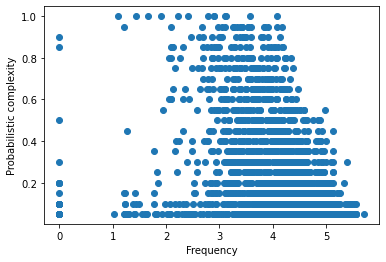

In [32]:
plt.scatter(frequency, prob)
plt.xlabel("Frequency")
plt.ylabel("Probabilistic complexity")
plt.show()

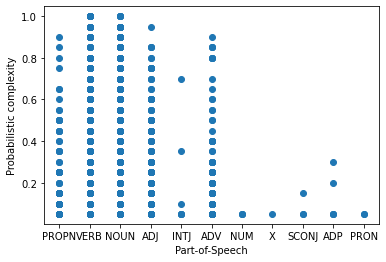

In [33]:
plt.scatter(pos, prob)
plt.xlabel("Part-of-Speech")
plt.ylabel("Probabilistic complexity")
plt.show()

<b>TASK 10</b><font color='red'> (must be included in file TODO_baselines.py)</font>

In [34]:
# Implement four baselines for the task.
# Majority baseline: always assigns the majority class of the training data
# Random baseline: randomly assigns one of the classes. Make sure to set a random seed and average the accuracy over 100 runs.
# Length baseline: determines the class based on a length threshold
# Frequency baseline: determines the class based on a frequency threshold

from model.data_loader import DataLoader

# Each baseline returns predictions for the test data. The length and frequency baselines determine a threshold using the development data.

def majority_baseline(train_sentences, train_labels, testinput, testlabels):
    #find out about majority  class in training data
    predictions = []
    for instance in train_labels:   
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            predictions.append(i)
            
    majority_class = Counter(predictions).most_common()[0][0]
    #assign to each token (word) in test data the majority class as predicted value
    predictions = []
    for instance in testinput:
        tokens = instance.split(" ")
        for _ in tokens:
            predictions.append(majority_class)
    
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions




def random_baseline(train_sentences, train_labels, testinput, testlabels):
    predictions = []
    for instance in train_labels:   
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            predictions.append(i)
    
    distinct_labels = list(set(predictions))

    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    #assign random label to test output 100 times and average accuracy
    accuracies = []
    for i in range (100):
        random.seed(i)
        predictions = []
        for instance in testinput:
            tokens = instance.split(" ")
            for _ in tokens:
                predictions.append(random.choice(distinct_labels))
        
        #calculate accuracy after each iteration with new random seed
        correct_labeled = 0
        for i in range(len(predictions)):
            if predictions[i] == test_labels[i]:
                correct_labeled += 1

        random_accuracy = round(correct_labeled/len(predictions), 2)
        accuracies.append(random_accuracy)
    
    accuracy = round(sum(accuracies)/len(accuracies), 2)
    return accuracy, predictions   



def length_baseline(testinput, testlabels, length_threshold):  
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)
    
    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if len(token) >= length_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  



def frequency_baseline(testinput, testlabels, frequency_threshold):
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if zipf_frequency(token, 'en') <= frequency_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  

if __name__ == '__main__':
    dir_path = cwd
    train_path = dir_path + "/data/preprocessed/train/"
    dev_path = dir_path + "/data/preprocessed/val/"          #changed from "/dev/" to "/val/" because there exists no "dev" folder
    test_path = dir_path + "/data/preprocessed/test/"

    # Note: this loads all instances into memory. If you work with bigger files in the future, use an iterator instead.

    with open(train_path + "sentences.txt") as sent_file:
        train_sentences = sent_file.readlines()

    with open(train_path + "labels.txt") as label_file:
        train_labels = label_file.readlines()

    with open(dev_path + "sentences.txt") as dev_file:
        dev_sentences = dev_file.readlines()

    with open(dev_path + "labels.txt") as dev_label_file:       #changed from "train_path" to "dev_path"
        dev_labels = dev_label_file.readlines()

    with open(test_path + "sentences.txt") as testfile:
        testinput = testfile.readlines()

    with open(test_path + "labels.txt") as test_label_file:
        testlabels = test_label_file.readlines()
        
    length_threshold = 8   #accuracy best at threshold 8         
    frequency_threshold = 4.52  #accuracy best at zipf-frequency-threshold 4.52
    dev_majority_accuracy, dev_majority_predictions = majority_baseline(train_sentences, train_labels, dev_sentences, dev_labels)
    dev_random_accuracy, dev_random_predictions = random_baseline(train_sentences, train_labels, dev_sentences, dev_labels)
    dev_length_accuracy, dev_length_predictions = length_baseline(dev_sentences, dev_labels, length_threshold)
    dev_frequency_accuracy, dev_frequency_predictions = frequency_baseline(dev_sentences, dev_labels, frequency_threshold)

    test_majority_accuracy, test_majority_predictions = majority_baseline(train_sentences, train_labels, testinput, testlabels)
    test_random_accuracy, test_random_predictions = random_baseline(train_sentences, train_labels, testinput, testlabels)
    test_length_accuracy, test_length_predictions = length_baseline(testinput, testlabels, length_threshold)
    test_frequency_accuracy, test_frequency_predictions = frequency_baseline(testinput, testlabels, frequency_threshold)
 

    baselines = ["Majority", "Random", "Length", "Frequency"]
    acc_dev = [dev_majority_accuracy, dev_random_accuracy, dev_length_accuracy, dev_frequency_accuracy]
    acc_test = [test_majority_accuracy, test_random_accuracy, test_length_accuracy, test_frequency_accuracy]
    baseline_df = pd.DataFrame({"Baseline":baselines, "Accuracy on dev": acc_dev, "Accuracy on test":acc_test})
    


In [35]:
baseline_df.head()

,Baseline,Accuracy on dev,Accuracy on test
0,Majority,0.85,0.80
1,Random,0.50,0.50
2,Length,0.88,0.87
3,Frequency,0.75,0.76


<h1><b>PART C</b></h1>

<b>TASK 12</b>
<font color='red'>(must be included in file TODO_detailed_evaluation.py)</font>

In [36]:
#-> LSTM was evaluated on test data, so we calculate precision, recall and F1 based on the results on the test data

def get_lstm_predictions(lstm_output):
    '''
    First column is gold label, Second column is prediction
    '''
    predictions = []
    for instance in lstm_output:
        tokens = instance.split("\t")
        if len(tokens) != 3: continue   #ignore separating rows   
        if tokens[2] == 'N\n':
            predictions.append('N')
        elif tokens[2] == 'C\n':
            predictions.append('C')
    return predictions

if __name__ == '__main__':

    with open(cwd + "/data/preprocessed/test/labels.txt") as test_label_file:
        testlabels = test_label_file.readlines()

    with open(cwd + "/experiments/base_model/model_output.tsv") as model_output:
        lstm_output = model_output.readlines()

    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)
    
    num_N_labels  = Counter(test_labels).most_common()[0][1]
    num_C_labels = Counter(test_labels).most_common()[1][1]
    print(num_N_labels)
    print(num_C_labels)

    _, test_majority_predictions = majority_baseline(train_sentences, train_labels, testinput, testlabels)
    _, test_random_predictions = random_baseline(train_sentences, train_labels, testinput, testlabels)
    _, test_length_predictions = length_baseline(testinput, testlabels, length_threshold)
    _, test_frequency_predictions = frequency_baseline(testinput, testlabels, frequency_threshold)
    lstm_prediction = get_lstm_predictions(lstm_output)


    # WHEN CLASS 'N' IS TRUE POSITIV
    # what is fp, fn, tp, tn depends on order of labels-argument in confusion matrix function, first element in labels-list is TP
    print(sklearn.metrics.confusion_matrix(test_labels, test_majority_predictions, labels = ['C', 'N']))
    # print(sklearn.metrics.confusion_matrix(test_labels, test_random_predictions, labels = ['N', 'C']))
    # print(sklearn.metrics.confusion_matrix(test_labels, test_length_predictions, labels = ['N', 'C']))
    # print(sklearn.metrics.confusion_matrix(test_labels, test_frequency_predictions, labels = ['N', 'C']))
    # print(sklearn.metrics.confusion_matrix(test_labels, lstm_prediction, labels = ['N', 'C']))

    # pos_label determines TP
    print("Scores with 'N' as TP:")
    print("Precision score majority baseline: " + str(sklearn.metrics.precision_score(test_labels, test_majority_predictions, pos_label='N')))
    print("Precision score random baseline: " + str(sklearn.metrics.precision_score(test_labels, test_random_predictions, pos_label='N')))
    print("Precision score length baseline: " + str(sklearn.metrics.precision_score(test_labels, test_length_predictions, pos_label='N')))
    print("Precision score frequency baseline: " + str(sklearn.metrics.precision_score(test_labels, test_frequency_predictions, pos_label='N')))
    print("Precision score LSTM: " + str(sklearn.metrics.precision_score(test_labels, lstm_prediction, pos_label='N')))
    print()
    print("Recall score majority baseline: " + str(sklearn.metrics.recall_score(test_labels, test_majority_predictions, pos_label='N')))
    print("Recall score random baseline: " + str(sklearn.metrics.recall_score(test_labels, test_random_predictions, pos_label='N')))
    print("Recall score length baseline: " + str(sklearn.metrics.recall_score(test_labels, test_length_predictions, pos_label='N')))
    print("Recall score frequency baseline: " + str(sklearn.metrics.recall_score(test_labels, test_frequency_predictions, pos_label='N')))
    print("Recall score LSTM: " + str(sklearn.metrics.recall_score(test_labels, lstm_prediction, pos_label='N')))
    print()
    print("F1 score majority baseline: " + str(sklearn.metrics.f1_score(test_labels, test_majority_predictions, pos_label='N')))
    print("F1 score random baseline: " + str(sklearn.metrics.f1_score(test_labels, test_random_predictions, pos_label='N')))
    print("F1 score length baseline: " + str(sklearn.metrics.f1_score(test_labels, test_length_predictions, pos_label='N')))
    print("F1 score frequency baseline: " + str(sklearn.metrics.f1_score(test_labels, test_frequency_predictions, pos_label='N')))
    print("F1 score LSTM: " + str(sklearn.metrics.f1_score(test_labels, lstm_prediction, pos_label='N')))

    # WHEN CLASS 'C' IS TRUE POSITIV
    print("\nScores with 'C' as TP:")
    print("Precision score majority baseline: " + str(sklearn.metrics.precision_score(test_labels, test_majority_predictions, pos_label='C')))
    print("Precision score random baseline: " + str(sklearn.metrics.precision_score(test_labels, test_random_predictions, pos_label='C')))
    print("Precision score length baseline: " + str(sklearn.metrics.precision_score(test_labels, test_length_predictions, pos_label='C')))
    print("Precision score frequency baseline: " + str(sklearn.metrics.precision_score(test_labels, test_frequency_predictions, pos_label='C')))
    print("Precision score LSTM: " + str(sklearn.metrics.precision_score(test_labels, lstm_prediction, pos_label='C')))
    print()
    print("Recall score majority baseline: " + str(sklearn.metrics.recall_score(test_labels, test_majority_predictions, pos_label='C')))
    print("Recall score random baseline: " + str(sklearn.metrics.recall_score(test_labels, test_random_predictions, pos_label='C')))
    print("Recall score length baseline: " + str(sklearn.metrics.recall_score(test_labels, test_length_predictions, pos_label='C')))
    print("Recall score frequency baseline: " + str(sklearn.metrics.recall_score(test_labels, test_frequency_predictions, pos_label='C')))
    print("Recall score LSTM: " + str(sklearn.metrics.recall_score(test_labels, lstm_prediction, pos_label='C')))
    print()
    print("F1 score majority baseline: " + str(sklearn.metrics.f1_score(test_labels, test_majority_predictions, pos_label='C')))
    print("F1 score random baseline: " + str(sklearn.metrics.f1_score(test_labels, test_random_predictions, pos_label='C')))
    print("F1 score length baseline: " + str(sklearn.metrics.f1_score(test_labels, test_length_predictions, pos_label='C')))
    print("F1 score frequency baseline: " + str(sklearn.metrics.f1_score(test_labels, test_frequency_predictions, pos_label='C')))
    print("F1 score LSTM: " + str(sklearn.metrics.f1_score(test_labels, lstm_prediction, pos_label='C')))

    # WEIGHTEST F1 SCORES
    print("\nWeighted F1-score majority baseline: "+ str(sklearn.metrics.f1_score(test_labels, test_majority_predictions, average='weighted')))
    print("Weighted F1-score random baseline: "+ str(sklearn.metrics.f1_score(test_labels, test_random_predictions, average='weighted')))
    print("Weighted F1-score length baseline: "+ str(sklearn.metrics.f1_score(test_labels, test_length_predictions, average='weighted')))
    print("Weighted F1-score frequency baseline: "+ str(sklearn.metrics.f1_score(test_labels, test_frequency_predictions, average='weighted')))
    print("Weighted F1-score LSTM: "+ str(sklearn.metrics.f1_score(test_labels, lstm_prediction, average='weighted')))

    
    # print(sklearn.metrics.recall_score(test_labels, lstm_prediction, pos_label='C'))

    # print(sklearn.metrics.f1_score(test_labels, lstm_prediction, pos_label='C'))



FileNotFoundError: [Errno 2] No such file or directory: '/home/damion/VU/NLPT/NLPT/experiments/base_model/model_output.tsv'

<b>TASK 14</b>
<font color='red'>(must be included in file TODO_detailed_evaluation.py)</font>

In [ ]:
with open(cwd + "/experiments/base_model/model_output.tsv") as model_output:
    lstm_output = model_output.readlines()
 
f = open(cwd + "/experiments/base_model/params.json")
params = json.load(f)

lstm_prediction = get_lstm_predictions(lstm_output)

weighted_F1_score_LSTM = sklearn.metrics.f1_score(test_labels, lstm_prediction, average='weighted')

#created a new file 'Weighted_F1_scores.txt' to save F1 scores and predictions for differnet hyperparamter values
with open(cwd + '/Weighted_F1_scores.txt', 'a') as f:
    f.write(str(params['learning_rate']) + " ")
    f.write(str(weighted_F1_score_LSTM) + " ")
    for i in lstm_prediction:
        f.write(str(i) + " ")
    f.write("\n")

In [ ]:
learning_rates = []
weighted_f1_scores = []
lstm_predictions = []

with open(cwd + '/Weighted_F1_scores.txt', 'r') as f:
    LSTM_metrics_output = f.readlines()

for instance in LSTM_metrics_output:
    output = instance.split(" ")
    learning_rates.append(float(output[0]))
    weighted_f1_scores.append(round(float(output[1]), 3))
    single_model_predictions = []
    for i in range(2, len(output)):
        if output[i] == '\n': continue
        else: single_model_predictions.append(output[i])
    lstm_predictions.append(single_model_predictions)

print(learning_rates)
print(weighted_f1_scores)
print(lstm_predictions)

In [ ]:
plt.plot(learning_rates, weighted_f1_scores, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Weighted F1 Score")
plt.xticks(rotation=45)
plt.show()

NameError: name 'learning_rates' is not defined

In [18]:
with open(cwd + "/data/preprocessed/test/sentences.txt") as test_sentences:
    test_sentences = test_sentences.readlines()

#get all tokens from test dataset
test_tokens = []
for instance in test_sentences:
    tokens = instance.split(" ")
    for i in tokens:         
        if i == 'N\n':
            i = 'N'
        elif i == 'C\n':
            i = 'C'
        test_tokens.append(i)

#find prediction changes for hyperparameter changes
for i in range(len(lstm_predictions)-1):
    for j in range(len(lstm_predictions[i])):
        if lstm_predictions[i][j] != lstm_predictions[i+1][j]:
            print("Hyperparam value " + str(i) + " vs Hyperparam value " + str(i+1) + "-> for Token: " + str(test_tokens[j]) + " , the prediction has changed from " + str(lstm_predictions[i][j] + " to " + str(lstm_predictions[i+1][j])))


NameError: name 'lstm_predictions' is not defined